# Correlation of Correlations (Fig 18 Data)

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
from analysis.correlation_of_correlations import *
from common.helpers import get_graphemes, get_phonemes

sns.set_style('darkgrid')

In [3]:
from tqdm import tqdm

## Load Activation Data

In [4]:
all_data = []
for dilution in range(1, 4):
    # Load anchors data
    hidden_data = pd.read_pickle(f'../cogsci-recurrent-dt-100-dilution-{dilution}-seed-1-partition-0-straight-through/results/activations-fig18-hidden.pkl')
    output_data = pd.read_pickle(f'../cogsci-recurrent-dt-100-dilution-{dilution}-seed-1-partition-0-straight-through/results/activations-fig18-output.pkl')
    hidden_data['epoch'] = hidden_data['epoch'].astype(int)
    output_data['epoch'] = output_data['epoch'].astype(int)
    activation_data = pd.merge(hidden_data, output_data, how='left', on=['epoch', 'word']).reset_index(drop=True)
    activation_data['dilution'] = dilution
    all_data.append(activation_data)
all_data = pd.concat(all_data)

In [5]:
orth_phon_mapping = pd.read_csv(f'../../../dataset/plaut_fig18_orth_phon_mapping.csv')
all_data = all_data.merge(orth_phon_mapping, left_on='word', right_on='orth')

In [6]:
# find input representations
inputs = []
for orth in all_data['orth'].unique():
    inputs.append({'orth': orth, 'input': get_graphemes(orth)})
inputs = pd.DataFrame(inputs)
all_data = all_data.merge(inputs, on='orth')

In [7]:
# find target representations
targets = []
for phon in all_data['phon'].unique():
    targets.append({'phon': phon, 'target': get_phonemes(phon)})
targets = pd.DataFrame(targets)
all_data = all_data.merge(targets, on='phon')

In [8]:
all_data

,epoch,word,hidden,output,dilution,orth,phon,type,input,target
0,0,want,"[0.7248079, 0.2818909, 0.2104573, 0.9836209, 0...","[0.9877923, 0.8854352, 0.5877398, 0.998485, 0....",1,want,/want/,Exception,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,50,want,"[0.620838, 0.09001492, 0.2285112, 0.2651135, 0...","[0.06630397, 0.0330174, 0.02404062, 0.02593412...",1,want,/want/,Exception,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,100,want,"[0.5761223, 0.1009034, 0.2844953, 0.09803075, ...","[0.03907225, 0.006508416, 0.008750028, 0.01900...",1,want,/want/,Exception,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,150,want,"[0.5345688, 0.1591924, 0.3017278, 0.06275875, ...","[0.02792612, 0.003161113, 0.004725981, 0.03099...",1,want,/want/,Exception,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,200,want,"[0.6126868, 0.1669227, 0.2629731, 0.06675604, ...","[0.03536168, 0.002240515, 0.002344158, 0.02688...",1,want,/want/,Exception,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...
34555,3750,word,"[0.01417373, 0.2893941, 0.002698043, 0.0004504...","[1.191596e-06, 5.31688e-05, 2.965998e-05, 0.00...",3,word,/wurd/,Exception,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
34556,3800,word,"[0.01421772, 0.289325, 0.002674675, 0.00045870...","[1.189131e-06, 5.287675e-05, 2.903589e-05, 0.0...",3,word,/wurd/,Exception,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
34557,3850,word,"[0.01424078, 0.2890878, 0.002644305, 0.0004682...","[1.195858e-06, 5.240727e-05, 2.843471e-05, 0.0...",3,word,/wurd/,Exception,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
34558,3900,word,"[0.0142883, 0.2887888, 0.002610818, 0.00047786...","[1.166857e-06, 5.225531e-05, 2.788371e-05, 0.0...",3,word,/wurd/,Exception,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


## Calculate Correlation Vectors

In [9]:
regulars = all_data[all_data['type'] == 'Regular Inconsistent']
exceptions = all_data[all_data['type'] == 'Exception']
nonwords = all_data[all_data['type'] == 'Nonword']

regulars = calculate_correlation_vectors(regulars)
exceptions = calculate_correlation_vectors(exceptions)
nonwords = calculate_correlation_vectors(nonwords)

100%|██████████| 80/80 [00:15<00:00,  5.15it/s]


In [10]:
regulars.head()

,epoch,word,hidden,output,dilution,orth,phon,type,input,target,input_corr_vector,hidden_corr_vector,output_corr_vector,target_corr_vector
0,0,cook,"[0.1174952, 0.2380579, 0.2199683, 0.9915131, 0...","[0.9931283, 0.7895859, 0.8524712, 0.997226, 0....",1,cook,/kuk/,Regular Inconsistent,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[-0.0444994159489985, -0.03960396039603961, -0...","[0.8292647905730783, 0.8508457371460476, 0.845...","[0.935275554321075, 0.9493966686975424, 0.9572...","[-0.0679575352774453, -0.05172413793103449, -0..."
1,0,plant,"[0.7361832, 0.3468333, 0.572368, 0.9954854, 0....","[0.9760641, 0.7954999, 0.5141869, 0.9984851, 0...",1,plant,/pl@nt/,Regular Inconsistent,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[-0.0444994159489985, -0.044499415948998505, 0...","[0.8292647905730783, 0.8426937599223504, 0.892...","[0.935275554321075, 0.9308713382757247, 0.9499...","[-0.0679575352774453, -0.06795753527744532, -0..."
2,0,here,"[0.3932778, 0.08376779, 0.2494428, 0.9785696, ...","[0.9897022, 0.9218654, 0.7186283, 0.9959471, 0...",1,here,/hEr/,Regular Inconsistent,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.03960396039603961, -0.044499415948998505, ...","[0.8508457371460476, 0.8426937599223504, 0.894...","[0.9493966686975424, 0.9308713382757247, 0.977...","[-0.05172413793103449, -0.06795753527744532, -..."
3,0,base,"[0.2144264, 0.1282767, 0.533012, 0.9967425, 0....","[0.9895144, 0.8696787, 0.7190951, 0.9982562, 0...",1,base,/bAs/,Regular Inconsistent,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[-0.0396039603960396, 0.18912251778324335, 0.2...","[0.8451545957719426, 0.8928625386115056, 0.894...","[0.9572794714676954, 0.9499976013023186, 0.977...","[-0.0517241379310345, -0.06795753527744532, -0..."
4,0,paid,"[0.2222524, 0.3927389, 0.09728114, 0.9951955, ...","[0.9811944, 0.8723346, 0.7623736, 0.9983622, 0...",1,paid,/pAd/,Regular Inconsistent,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[-0.044499415948998464, 0.36999999999999983, -...","[0.8310679446195118, 0.8693705470663681, 0.834...","[0.9624696894437078, 0.9655895013569317, 0.955...","[-0.0517241379310345, 0.2084031081841655, -0.0..."


## Calculate Correlation of Correlations

In [11]:
regulars = calculate_cross_layer_correlation(regulars)
exceptions = calculate_cross_layer_correlation(exceptions)
nonwords = calculate_cross_layer_correlation(nonwords)

In [12]:
regulars.head()

,epoch,word,hidden,output,dilution,orth,phon,type,input,target,input_corr_vector,hidden_corr_vector,output_corr_vector,target_corr_vector,orth_hidden_corr,hidden_phon_corr,orth_phon_corr,orth_target_corr
0,0,cook,"[0.1174952, 0.2380579, 0.2199683, 0.9915131, 0...","[0.9931283, 0.7895859, 0.8524712, 0.997226, 0....",1,cook,/kuk/,Regular Inconsistent,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[-0.0444994159489985, -0.03960396039603961, -0...","[0.8292647905730783, 0.8508457371460476, 0.845...","[0.935275554321075, 0.9493966686975424, 0.9572...","[-0.0679575352774453, -0.05172413793103449, -0...",0.822512,0.664803,0.681320,0.552073
1,0,plant,"[0.7361832, 0.3468333, 0.572368, 0.9954854, 0....","[0.9760641, 0.7954999, 0.5141869, 0.9984851, 0...",1,plant,/pl@nt/,Regular Inconsistent,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[-0.0444994159489985, -0.044499415948998505, 0...","[0.8292647905730783, 0.8426937599223504, 0.892...","[0.935275554321075, 0.9308713382757247, 0.9499...","[-0.0679575352774453, -0.06795753527744532, -0...",0.616477,0.609895,0.686960,0.840355
2,0,here,"[0.3932778, 0.08376779, 0.2494428, 0.9785696, ...","[0.9897022, 0.9218654, 0.7186283, 0.9959471, 0...",1,here,/hEr/,Regular Inconsistent,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.03960396039603961, -0.044499415948998505, ...","[0.8508457371460476, 0.8426937599223504, 0.894...","[0.9493966686975424, 0.9308713382757247, 0.977...","[-0.05172413793103449, -0.06795753527744532, -...",0.687399,0.594957,0.304403,0.760923
3,0,base,"[0.2144264, 0.1282767, 0.533012, 0.9967425, 0....","[0.9895144, 0.8696787, 0.7190951, 0.9982562, 0...",1,base,/bAs/,Regular Inconsistent,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[-0.0396039603960396, 0.18912251778324335, 0.2...","[0.8451545957719426, 0.8928625386115056, 0.894...","[0.9572794714676954, 0.9499976013023186, 0.977...","[-0.0517241379310345, -0.06795753527744532, -0...",0.602872,0.594642,0.398316,0.584930
4,0,paid,"[0.2222524, 0.3927389, 0.09728114, 0.9951955, ...","[0.9811944, 0.8723346, 0.7623736, 0.9983622, 0...",1,paid,/pAd/,Regular Inconsistent,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[-0.044499415948998464, 0.36999999999999983, -...","[0.8310679446195118, 0.8693705470663681, 0.834...","[0.9624696894437078, 0.9655895013569317, 0.955...","[-0.0517241379310345, 0.2084031081841655, -0.0...",0.603498,0.571118,0.369023,0.683627


In [13]:
accum = []
for df in [regulars, nonwords, exceptions]:
    for col in ['orth_hidden_corr', 'hidden_phon_corr', 'orth_phon_corr', 'orth_target_corr']:
        temp = df[['epoch', 'orth', 'type', 'dilution']]
        temp['corr'] = df[col]
        temp['corr_type'] = col.rstrip('_corr').replace('_', '-').title()
        accum.append(temp)
all_data = pd.concat(accum)

In [14]:
all_data

,epoch,orth,type,dilution,corr,corr_type
0,0,cook,Regular Inconsistent,1,0.822512,Orth-Hidden
1,0,plant,Regular Inconsistent,1,0.616477,Orth-Hidden
2,0,here,Regular Inconsistent,1,0.687399,Orth-Hidden
3,0,base,Regular Inconsistent,1,0.602872,Orth-Hidden
4,0,paid,Regular Inconsistent,1,0.603498,Orth-Hidden
...,...,...,...,...,...,...
11515,3950,plow,Exception,3,0.499275,Orth-Target
11516,3950,doll,Exception,3,0.429658,Orth-Target
11517,3950,shall,Exception,3,0.531318,Orth-Target
11518,3950,deaf,Exception,3,0.295521,Orth-Target


## Plot Results

In [15]:
TYPE_ORDER = ['Regular Inconsistent', 'Nonword', 'Exception']
CORR_TYPE_ORDER = ['Orth-Hidden', 'Hidden-Phon', 'Orth-Phon', 'Orth-Target']

In [16]:
all_data = all_data[all_data['epoch'] >= 100]
all_data_small = all_data[all_data['epoch'] % 100 == 0]

### All Dilution Levels

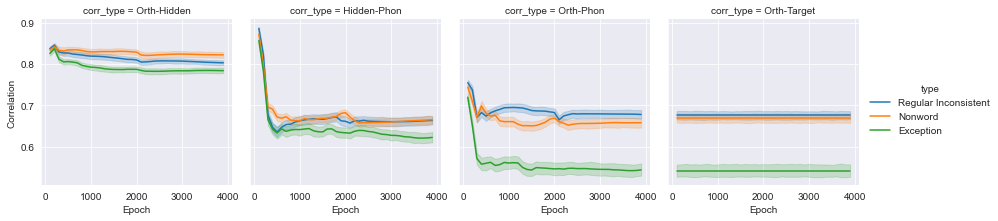

In [17]:
g = sns.FacetGrid(all_data_small, col='corr_type', hue='type', col_order=CORR_TYPE_ORDER, hue_order=TYPE_ORDER)
g.map_dataframe(sns.lineplot, x='epoch', y='corr', ci=68)
g.set_axis_labels("Epoch", "Correlation")
g.add_legend()
plt.show()

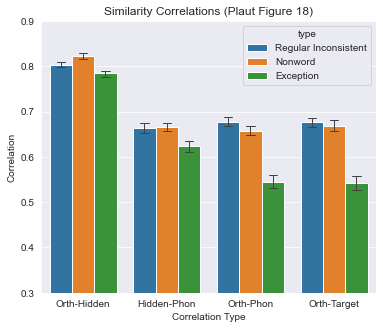

In [18]:
generate_correlation_of_correlations_barplot(all_data, epoch=all_data['epoch'].max(), ylim=(0.3, 0.9),
                                             hue_order=TYPE_ORDER, order=CORR_TYPE_ORDER)

### Individual Dilution Levels

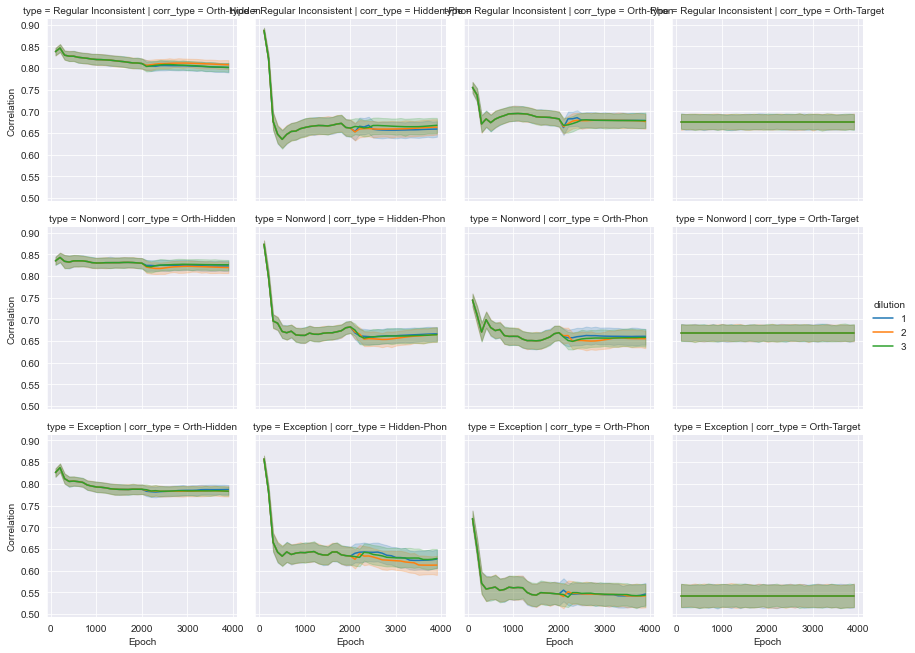

In [19]:
g = sns.FacetGrid(all_data_small, col='corr_type', row='type', hue='dilution', 
                  col_order=CORR_TYPE_ORDER, row_order=TYPE_ORDER)
g.map_dataframe(sns.lineplot, x='epoch', y='corr', ci=68)
g.set_axis_labels("Epoch", "Correlation")
g.add_legend()
plt.show()

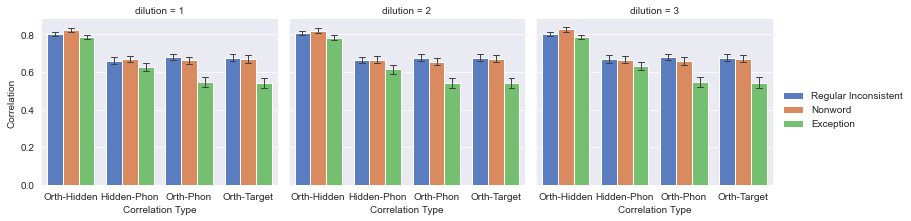

In [20]:
g = sns.FacetGrid(all_data[all_data['epoch'] == all_data['epoch'].max()], col='dilution', aspect=1.2)
g.map_dataframe(sns.barplot, x='corr_type', y='corr', hue='type', hue_order=TYPE_ORDER, ci=68, 
                palette='muted', errwidth=1, capsize=0.1)
g.set_axis_labels("Correlation Type", "Correlation")
g.add_legend()
plt.show()